

<h1><center>Hierarchical Clustering</center></h1>

In [2]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

### Generating Random Data

In [5]:
X1, y1 = make_blobs(n_samples=500, centers=[[5,5], [-2, -1],[10,4]], cluster_std=0.5)

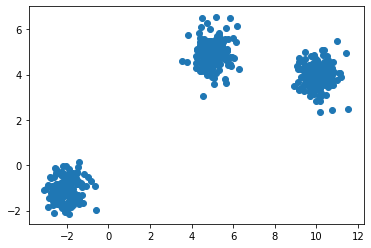

In [6]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

### Agglomerative Clustering
clustering the random data points we just created.

In [7]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')

In [8]:
agglom.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3,
                        pooling_func='deprecated')

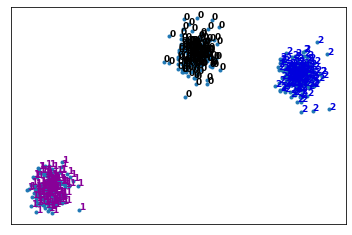

In [9]:

plt.figure(figsize=(6,4))

x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)


X1 = (X1 - x_min) / (x_max - x_min)

for i in range(X1.shape[0]):
    
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    

plt.xticks([])
plt.yticks([])

plt.scatter(X1[:, 0], X1[:, 1], marker='.')

plt.show()


### Dendrogram Associated for the Agglomerative Hierarchical Clustering


In [12]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         1.0290972  0.27332963 ... 0.31687889 0.39070194 0.37639005]
 [1.0290972  0.         0.90959001 ... 0.82128184 1.049918   0.95775831]
 [0.27332963 0.90959001 0.         ... 0.08846963 0.18460142 0.12157886]
 ...
 [0.31687889 0.82128184 0.08846963 ... 0.         0.25296323 0.16954689]
 [0.39070194 1.049918   0.18460142 ... 0.25296323 0.         0.09221347]
 [0.37639005 0.95775831 0.12157886 ... 0.16954689 0.09221347 0.        ]]


In [13]:
Z = hierarchy.linkage(dist_matrix, 'complete')

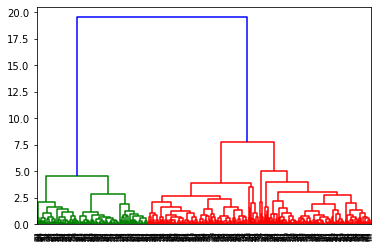

In [14]:
dendro = hierarchy.dendrogram(Z)